<a href="https://colab.research.google.com/github/rittikarijhwani/ML-lab-sem7/blob/main/exp_5_decision_tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#ready

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

df = pd.read_csv('pakistan_hunger_data.csv')
df.head()

,City,Year,Population_Under_Poverty,Malnutrition_Rate,Food_Insecurity,Access_to_Clean_Water,Food_Production_Index,Children_Underweight
0,Quetta,2021,23.8,23.0,22.0,82.2,95.1,31.7
1,Hyderabad,2023,29.6,17.7,23.3,82.7,90.8,27.5
2,Rawalpindi,2020,25.3,23.0,24.4,89.0,99.6,25.8
3,Karachi,2021,25.4,19.3,20.6,87.5,98.3,25.4
4,Peshawar,2022,27.5,16.2,21.5,84.8,96.2,33.7


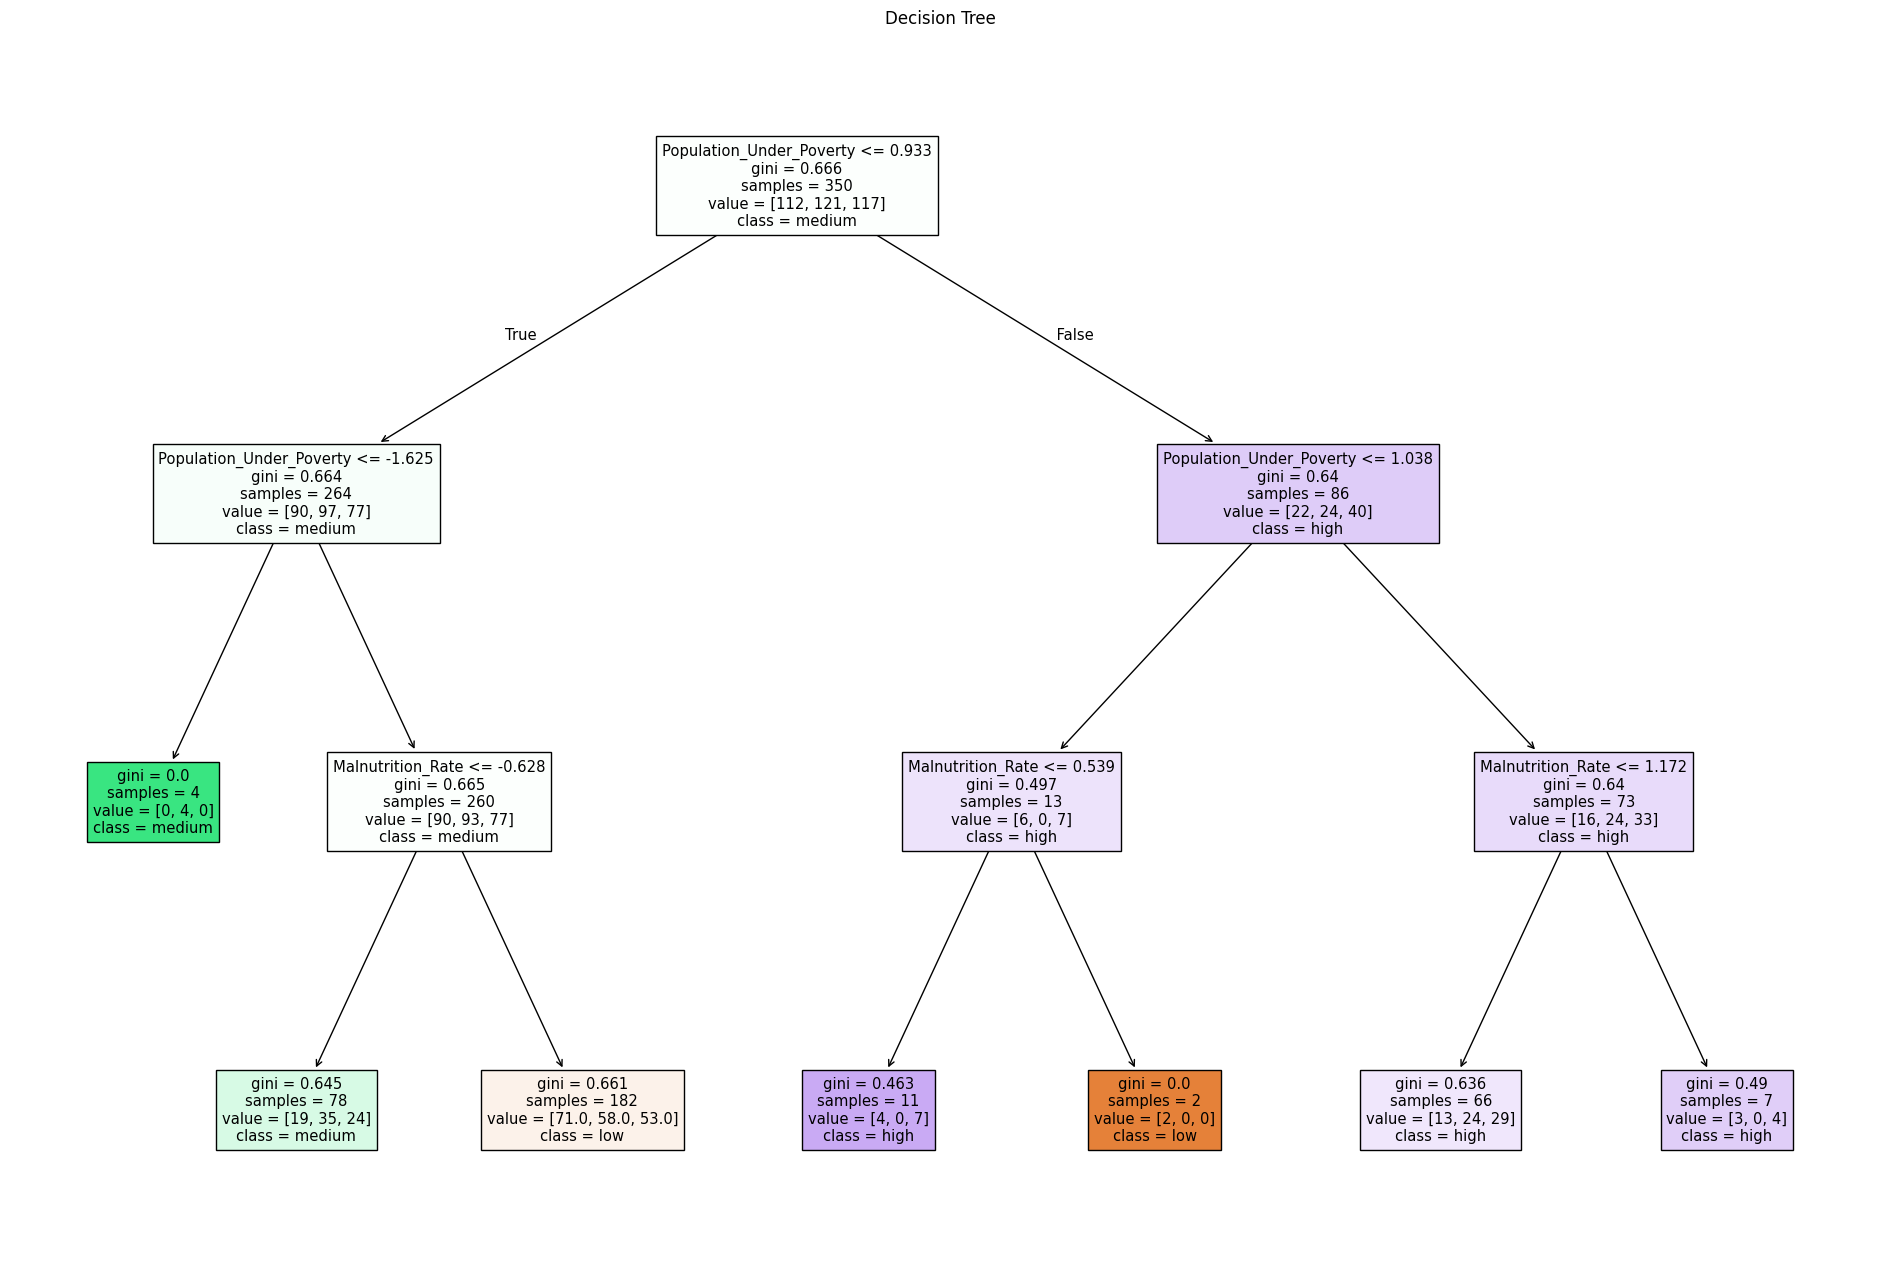

In [17]:
#creates new class/column, categories made by dividing the data using quartiles
df['Children_Underweight_Class'] = pd.qcut(df['Children_Underweight'], q=3, labels=['low', 'medium', 'high'])
#represents target variable
y_class = df['Children_Underweight_Class']

#preprocessing step 1: imputation for missing values
#X_imputed - fit part calculates the mean values for each column, transform part replaces missing values with these means
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X) #performs both fitting and transformation

#preprocessing step 2: standardization
#standardize the features by subtracting the mean and dividing by the standard deviation
#X_scaled - fit part calculates the mean and standard deviation for each column, transform part standardizes the features accordingly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed) #performs both fitting and transformation

#train-test split - 70/30, random_state=42 is random seed for split to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.3, random_state=42)

#trains decision tree classifier - clf is instance of decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

#testing
y_pred = clf.predict(X_test)

#plotting the decision tree
plt.figure(figsize=(24, 16))

#main line
plot_tree(clf, filled=True, feature_names=['Population_Under_Poverty', 'Malnutrition_Rate', 'Food_Insecurity', 'Access_to_Clean_Water'], class_names=['low', 'medium', 'high'])

plt.title("Decision Tree")
plt.show()

In [16]:
y_pred = clf.predict(X_test)

#confusion matrix - inbuilt scikit learn
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#classification report (Precision, Recall, F1-Score, and Accuracy) - inbuilt scikit learn
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[21 14 15]
 [27 16  6]
 [30 14  7]]

Classification Report:
              precision    recall  f1-score   support

        high       0.27      0.42      0.33        50
         low       0.36      0.33      0.34        49
      medium       0.25      0.14      0.18        51

    accuracy                           0.29       150
   macro avg       0.29      0.29      0.28       150
weighted avg       0.29      0.29      0.28       150

